#### Домашнаяя работа №7

In [2]:
import pandas as pd 
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score
import json

### Подготовка данных

In [3]:
df_1 = pd.read_csv("data/S07-hw-dataset-01.csv")
df_2 = pd.read_csv("data/S07-hw-dataset-02.csv")

Для датасета №1

In [4]:
df_1.head(10)

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
0,0,-0.536647,-69.812900,-0.002657,71.743147,-11.396498,-12.291287,-6.836847,-0.504094
1,1,15.230731,52.727216,-1.273634,-104.123302,11.589643,34.316967,-49.468873,0.390356
2,2,18.542693,77.317150,-1.321686,-111.946636,10.254346,25.892951,44.595250,0.325893
3,3,-12.538905,-41.709458,0.146474,16.322124,1.391137,2.014316,-39.930582,0.139297
4,4,-6.903056,61.833444,-0.022466,-42.631335,3.107154,-5.471054,7.001149,0.131213
5,5,-9.155108,80.803958,-0.023064,-42.562391,2.681999,-10.450216,52.285727,0.134157
6,6,-13.414198,-45.224459,0.016343,23.198649,0.275342,4.845267,40.734814,0.040547
7,7,-15.303931,-39.539061,0.198038,21.117504,0.334350,1.308574,17.347164,0.378773
8,8,-15.154668,-34.099503,0.215049,18.059247,1.937555,2.834771,-87.429349,-0.191803
9,9,0.673476,-82.966506,-0.066941,70.082996,-11.262309,-7.221289,-28.222359,-0.383327


In [24]:
df_1.shape

(12000, 9)

In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  float64
 3   f03        12000 non-null  float64
 4   f04        12000 non-null  float64
 5   f05        12000 non-null  float64
 6   f06        12000 non-null  float64
 7   f07        12000 non-null  float64
 8   f08        12000 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


In [6]:
df_1.describe()

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,5999.50000,-2.424716,19.107804,-0.222063,-8.284501,-0.190717,0.962972,0.033724,0.007638
std,3464.24595,11.014315,60.790338,0.500630,59.269838,7.026435,14.794713,59.541782,0.607053
min,0.00000,-19.912573,-92.892652,-1.590979,-134.303679,-11.869169,-20.521164,-215.098834,-2.633469
25%,2999.75000,-9.472623,-40.282955,-0.125145,-48.345007,-5.132473,-8.807706,-39.900520,-0.401483
50%,5999.50000,-6.869404,54.069335,-0.031753,16.211728,0.444730,-6.134169,-0.578494,0.005306
75%,8999.25000,0.523841,70.280739,0.054980,28.067178,3.942368,2.334426,39.719821,0.410132
max,11999.00000,24.403381,112.229523,0.512277,75.088604,13.717091,41.452857,213.381767,2.490745


In [7]:
df_1.isna().sum().sum()

0

In [8]:
df_1.dtypes

sample_id      int64
f01          float64
f02          float64
f03          float64
f04          float64
f05          float64
f06          float64
f07          float64
f08          float64
dtype: object

In [9]:
X_df_1 = df_1.loc[:, "f01":]
X_sample_id_1 = df_1["sample_id"]

X_df_1_num =X_df_1.columns.tolist()
X_df_1_num

['f01', 'f02', 'f03', 'f04', 'f05', 'f06', 'f07', 'f08']

Для датасета №2

In [10]:
df_2.head(10)

,sample_id,x1,x2,z_noise
0,0,0.098849,-1.846034,21.288122
1,1,-1.024516,1.829616,6.072952
2,2,-1.094178,-0.158545,-18.938342
3,3,-1.612808,-1.565844,-11.629462
4,4,1.659901,-2.133292,1.895472
5,5,-0.932356,2.894645,-9.150930
6,6,0.117411,0.834173,4.382666
7,7,1.024343,-1.421237,-3.629838
8,8,-0.468618,-0.296113,-9.568211
9,9,-1.231242,-1.213089,-7.716715


In [25]:
df_2.shape

(8000, 4)

In [11]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  8000 non-null   int64  
 1   x1         8000 non-null   float64
 2   x2         8000 non-null   float64
 3   z_noise    8000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 250.1 KB


In [12]:
df_2.describe()

,sample_id,x1,x2,z_noise
count,8000.00000,8000.000000,8000.000000,8000.000000
mean,3999.50000,0.478867,0.241112,0.110454
std,2309.54541,0.955138,0.663195,8.097716
min,0.00000,-2.487352,-2.499237,-34.056074
25%,1999.75000,-0.116516,-0.242357,-5.392210
50%,3999.50000,0.490658,0.241092,0.132470
75%,5999.25000,1.085263,0.726526,5.655605
max,7999.00000,2.987555,2.995553,29.460076


In [13]:
df_2.isna().sum().sum()

0

In [14]:
df_2.dtypes

sample_id      int64
x1           float64
x2           float64
z_noise      float64
dtype: object

In [15]:
X_df_2 = df_2.loc[:, "x1": ]

X_sample_id_2 = df_2.loc[:, "sample_id"]

X_df_2_num = X_df_2.columns.tolist()

Для датасета №4

In [ ]:
df_4 = pd.read_csv("data/S07-hw-dataset-04.csv")

In [26]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  10000 non-null  int64  
 1   cat_a      10000 non-null  object 
 2   cat_b      10000 non-null  object 
 3   n01        9826 non-null   float64
 4   n02        9811 non-null   float64
 5   n03        9801 non-null   float64
 6   n04        9808 non-null   float64
 7   n05        9799 non-null   float64
 8   n06        9817 non-null   float64
 9   n07        9796 non-null   float64
 10  n08        9806 non-null   float64
 11  n09        9805 non-null   float64
 12  n10        9811 non-null   float64
 13  n11        9796 non-null   float64
 14  n12        9798 non-null   float64
 15  n13        9803 non-null   float64
 16  n14        9802 non-null   float64
 17  n15        9814 non-null   float64
 18  n16        9809 non-null   float64
 19  n17        9788 non-null   float64
 20  n18    

In [27]:
df_4.shape

(10000, 33)

In [30]:
df_4.isna().sum().sum()

5915

In [29]:
df_4.isna().sum()

sample_id      0
cat_a          0
cat_b          0
n01          174
n02          189
n03          199
n04          192
n05          201
n06          183
n07          204
n08          194
n09          195
n10          189
n11          204
n12          202
n13          197
n14          198
n15          186
n16          191
n17          212
n18          212
n19          187
n20          203
n21          215
n22          196
n23          171
n24          207
n25          185
n26          224
n27          197
n28          211
n29          202
n30          195
dtype: int64

In [31]:
df_4.describe()

,sample_id,n01,n02,n03,n04,n05,n06,n07,n08,n09,...,n21,n22,n23,n24,n25,n26,n27,n28,n29,n30
count,10000.00000,9826.000000,9811.000000,9801.000000,9808.000000,9799.000000,9817.000000,9796.000000,9806.000000,9805.000000,...,9785.000000,9804.000000,9829.000000,9793.000000,9815.000000,9776.000000,9803.000000,9789.000000,9798.000000,9805.000000
mean,4999.50000,17.348435,-2.057620,7.908302,14.269157,0.900590,5.832787,-0.840875,-4.888128,3.184200,...,-12.716502,-0.506241,8.360226,0.026943,0.039297,-0.037155,0.028512,-0.030738,-0.018685,-0.030254
std,2886.89568,22.578551,19.043410,25.637807,18.815319,20.981294,13.221646,26.583849,15.466271,32.208740,...,37.290305,14.336833,17.754646,26.121335,3.009995,3.020813,3.028106,3.000090,3.014209,3.014573
min,0.00000,-22.437090,-37.546998,-38.136412,-23.374316,-45.914070,-20.650038,-60.297304,-44.464550,-70.904880,...,-89.640783,-35.102360,-25.014050,-49.423300,-11.225848,-14.446922,-10.840777,-11.679259,-11.437909,-11.491223
25%,2499.75000,-3.975438,-14.200552,-8.591513,-1.223379,-5.086756,-4.532057,-13.554720,-17.352641,-11.460490,...,-41.284671,-11.563652,-2.123576,-19.425213,-1.973213,-2.082235,-2.007628,-2.074500,-2.051778,-2.074396
50%,4999.50000,22.042807,-6.532183,0.350400,10.069142,2.413111,7.391953,-2.429024,-7.095546,13.258691,...,-1.145681,2.491416,6.691365,-8.464171,0.037806,-0.033336,0.031588,-0.043127,-0.015441,-0.015903
75%,7499.25000,37.535647,2.092197,30.725630,29.807101,18.398883,13.033076,16.095731,3.909111,20.188426,...,18.916379,11.903004,14.939690,16.861978,2.048648,2.019027,2.056870,1.980217,2.013964,2.031215
max,9999.00000,65.446912,43.326647,60.185729,65.094588,42.527554,39.933274,48.591236,31.335431,64.696045,...,49.157087,22.452135,46.892903,61.540902,11.002135,11.394631,11.936846,10.663960,10.665988,13.755203


In [16]:

X_df_4 = df_4.loc[:, "cat_a":]

X_sample_id_4 = df_4.loc[:, "sample_id"]
X_df_4_num =  df_4.loc[:, "n01":].columns.tolist()
X_df_4_categ =  df_4.loc[:, "cat_a":"cat_b"].columns.tolist()

df_4

,sample_id,cat_a,cat_b,n01,n02,n03,n04,n05,n06,n07,...,n21,n22,n23,n24,n25,n26,n27,n28,n29,n30
0,0,B,X,-4.827501,-24.507466,-7.852963,0.771781,28.297884,-4.493911,-42.769449,...,24.597176,-26.354320,4.543397,-19.549036,-3.051332,-5.538587,-3.084457,5.499629,-6.128896,3.132067
1,1,F,V,51.302500,NaN,5.534737,51.305464,-8.027553,28.297548,NaN,...,-18.216260,8.527932,17.202115,-30.452260,0.855326,1.199066,3.597555,-2.239703,2.932710,0.473145
2,2,A,W,-4.820828,-2.625385,27.891578,1.523041,-5.776687,-16.298523,2.462937,...,-48.260775,9.313232,12.323411,55.081325,-3.945606,-0.280540,-0.130583,-7.353205,-2.942836,1.460477
3,3,B,X,-2.627573,-25.063639,-9.450011,-8.344669,22.371118,-11.525848,-43.762607,...,24.700663,-25.466915,-3.398665,-18.174541,0.438229,3.152556,3.859283,-2.678769,-2.213923,-4.724639
4,4,C,Y,-11.415710,-8.692169,48.636163,14.661826,-39.634618,10.769075,40.187536,...,-79.710383,-13.694253,41.575892,-9.498640,1.529608,-1.641347,3.500090,3.111257,1.475232,-1.321676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,B,Y,-12.919119,-9.267355,47.395822,16.511540,-41.729247,7.799989,44.328290,...,-78.743409,-11.366750,36.477397,NaN,0.297751,1.243343,-1.600864,1.911969,NaN,0.670396
9996,9996,F,V,52.254641,-5.019958,0.993982,53.264712,-14.450314,36.732040,28.145815,...,-23.303770,17.161685,23.882319,-34.536261,1.294916,NaN,-7.103462,-3.585500,-1.395671,2.595430
9997,9997,E,U,33.523186,37.236276,-25.926850,2.988096,19.835512,13.452346,-10.263819,...,16.698474,16.473067,-16.313042,16.091088,0.112241,2.087142,-0.415373,-2.160709,2.007264,-1.058989
9998,9998,C,Y,-14.673242,-11.949793,48.937510,13.509319,-39.930625,6.829405,37.074823,...,-75.828139,NaN,39.972907,-6.301002,3.193872,-3.664677,4.156100,2.483901,-0.709864,-3.844730


### Предобработка данных
Категоральные признаки не исключаю, а преобразовываю в числовые

In [ ]:
def preprocessor(numeruc, categoral):
    return ColumnTransformer([
        ("num", Pipeline([
            ('imputer', SimpleImputer(strategy="mean")),
            ('scaler', StandardScaler())
        ]), numeruc),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
            ("one_hot", OneHotEncoder(handle_unknown="ignore"))
        ]), categoral)
    ])

### Функции визуализации данных

In [18]:
def PCA_2D_scatter(X_processed, labels, title):

    pca = PCA(n_components=2, random_state=42)
    X_2d = pca.fit_transform(X_processed)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis',  s=50)
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.savefig(f"artifacts/figures/{title}.png")
    plt.show()

In [19]:
def save_metrics(X, labels, dataset_name, model_name):

    noise_points = np.sum(labels == -1)
    noise_ratio = noise_points/ len(labels)

    if noise_points > 0:
        mask = labels != -1
        X_clean = X[mask]
        labels_clean = labels[mask]
    else:
        X_clean = X
        labels_clean = labels

    silhouette = silhouette_score(X_clean, labels_clean)
    davies = davies_bouldin_score(X_clean, labels_clean)
    calinski = calinski_harabasz_score(X_clean, labels_clean)

    return {
        "dataset": dataset_name,
        "model": model_name,
        "noise_points": int(noise_points),
        "noise_ratio": float(noise_ratio),
        "sihouette_score": silhouette,
        "davies_bouldin_score": davies,
        "calinski_harabasz_score": calinski
    }


In [20]:
def silhouette_vs_k(X_processed,n_dataset, n_init = 15, random_state = 42):
    k_range = range(2, 8)
    best_k = 0
    max_silhouette = 0

    silhouette = []

    for k in k_range:
        model = KMeans(n_clusters=k, n_init=n_init, random_state=random_state)
        labels = model.fit_predict(X_processed)
        new_silhouette = silhouette_score(X_processed, labels)
        silhouette.append(new_silhouette)
        if new_silhouette > max_silhouette:
            best_k = k
            max_silhouette = new_silhouette

    plt.figure(figsize=(8, 5))
    plt.plot(k_range, silhouette)
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Silhouette score")
    plt.title(f'Silhouette Score vs k {n_dataset}')
    plt.grid(True)
    plt.savefig(f"artifacts/figures/silhouette_vs_k_{n_dataset}.png")
    plt.show()

    print(f"Best k: {best_k}")
    print(f"Best silhouette_score: {max_silhouette}")

In [21]:
def silhouette_vs_eps(X_processed, n_dataset):
    eps_range = np.linspace(0.08, 4, 15)
    best_eps = 0
    max_silhouette = 0

    silhouette_scores = []

    for i in eps_range:
        dbscan = DBSCAN(eps = i, min_samples=5)
        labels = dbscan.fit_predict(X_processed)

        mask = labels != -1
        X_clean = X_processed[mask]
        labels_clean = labels[mask]

        if len(X_clean) == 0:
            new_silhouette = -1

        elif len(set(labels_clean)) < 3:
            new_silhouette = -1
            
        elif len(X_clean) < 10:
            new_silhouette = -1
            
        else: 
            new_silhouette = silhouette_score(X_clean, labels_clean)
        
        silhouette_scores.append(new_silhouette)

        if new_silhouette > max_silhouette:
            max_silhouette = new_silhouette
            best_eps = i

    plt.figure(figsize=(8, 5))
    plt.plot(eps_range, silhouette_scores)
    plt.xlabel("EPS")
    plt.ylabel("Silhouette_score")
    plt.title(f"Silhouette Score vs eps {n_dataset}")
    plt.grid(True)
    plt.savefig(f"artifacts/figures/silhouette_vs_eps_{n_dataset}.png")
    plt.show()

    print(f"Best eps: {best_eps}")
    print(f"Best silhouette_score: {max_silhouette}")

### Работа с массивами

In [22]:

preproces_df_1 = preprocessor(X_df_1_num, [])
X_df_1_processed = preproces_df_1.fit_transform(X_df_1)

model_1_1 = KMeans(n_clusters=2, random_state=42, n_init = 15)
model_1_2 = DBSCAN(eps = 1.5, min_samples=5)

labels_1_1 = model_1_1.fit_predict(X_df_1_processed) 
labels_1_2 = model_1_2.fit_predict(X_df_1_processed)


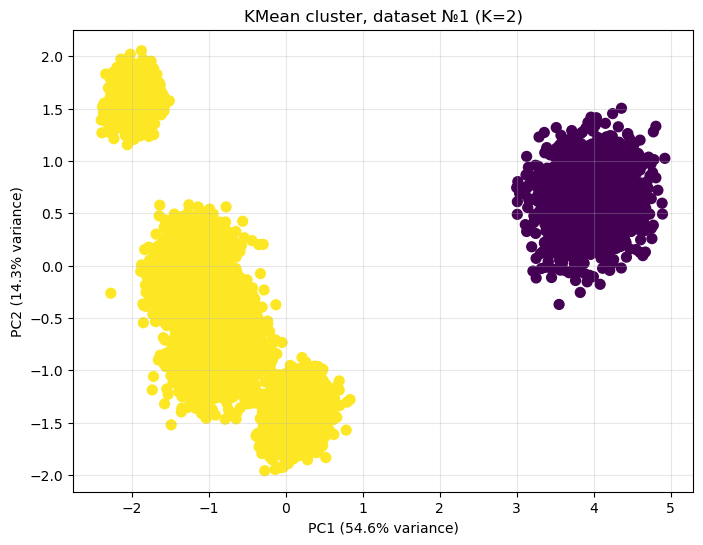

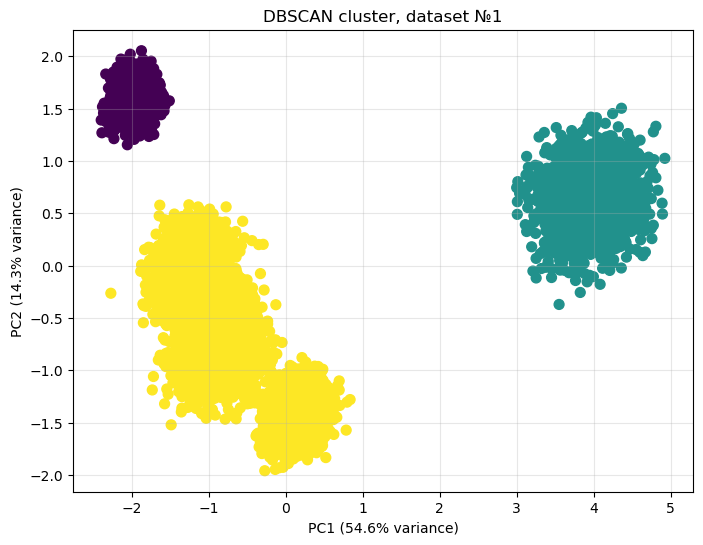

KeyboardInterrupt: 

In [23]:
PCA_2D_scatter(X_df_1_processed, labels_1_1, f"KMean cluster, dataset №1 (K={model_1_1.n_clusters})")
PCA_2D_scatter(X_df_1_processed, labels_1_2, f"DBSCAN cluster, dataset №1")
silhouette_vs_k(X_df_1_processed, "(dataset №1)")
silhouette_vs_eps(X_df_1_processed, "(dataset №1)")

In [ ]:
metrics_1_1 = save_metrics(X_df_1_processed, labels_1_1, "Dataset №1", "Kmean")
for i in metrics_1_1:
    print(f'{i}: {metrics_1_1[i]}')

print("----------------------------------------------------------------------")

metrics_1_2 =save_metrics(X_df_1_processed, labels_1_2, "Dataset №1", "DBSCAN")
for i in metrics_1_2:
    print(f"{i}: {metrics_1_2[i]}")

dataset: Dataset №1
model: Kmean
noise_points: 0
noise_ratio: 0.0
sihouette_score: 0.5216395622404242
davies_bouldin_score: 0.6853295219054456
calinski_harabasz_score: 11786.954622671532
----------------------------------------------------------------------
dataset: Dataset №1
model: DBSCAN
noise_points: 0
noise_ratio: 0.0
sihouette_score: 0.3967888223601393
davies_bouldin_score: 0.9644102343879996
calinski_harabasz_score: 10446.597694416178


#### Вывод по метрикам:
По всем трем основным критериям модель KMeans оказалась эффективнее. Это указывает на то, что для структуры разбиения данных на сферические класстеры, KMeans является наиболее подходящей моделью, нежели DBSCAN, которая ищет кластеры произвольной формы на основе плотности.

Сложно было понять сколько кластеров в этом датасете, если смотреть на визуализацию данных, то чётко прослеживаются 4-5 кластеров, но если смотреть метрики, ясно, что наибольшее silhouette_score прослеживается с 2 кластерами. 

Так же было довольно сложно подобрать eps для DBSCAN, я предполагала, что чем меньше этот параметр, тем чётче он будет определять кластеры, но на деле вместо кластеров появлялся только шум. Впоследствии было принято решение брать eps больше, и результат стал заметно лучше, что видно как на графике визуализации данных, так и на графике silhouette_vs_eps.

In [ ]:
preproces_df_2 = preprocessor(X_df_2_num, [])
X_df_2_processed = preproces_df_2.fit_transform(X_df_2)

model_2_1 = KMeans(n_clusters=2, random_state=42, n_init =15)
model_2_2 = AgglomerativeClustering(n_clusters=2, linkage='ward', metric= "euclidean")

labels_2_1 = model_2_1.fit_predict(X_df_2_processed)
labels_2_2 = model_2_2.fit_predict(X_df_2_processed)

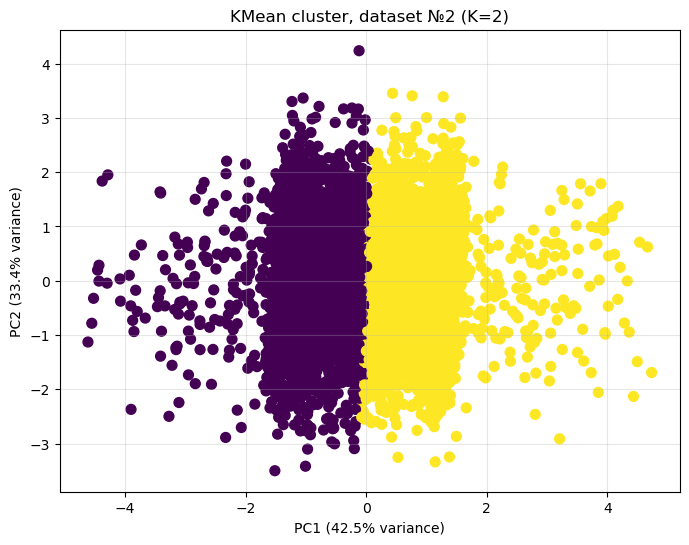

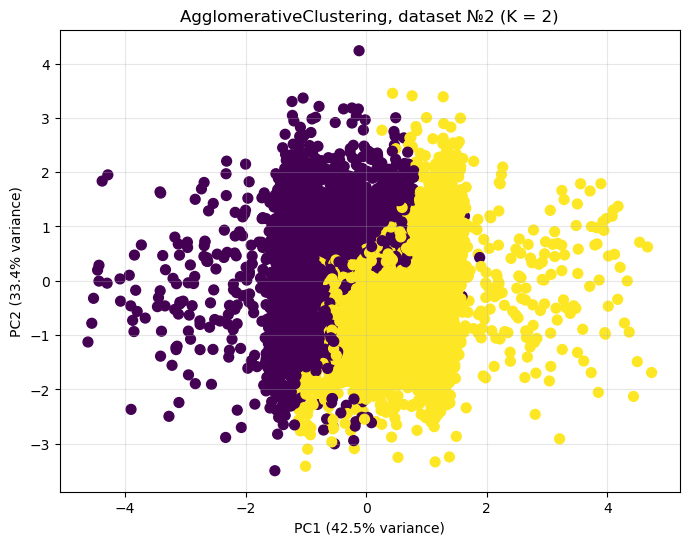

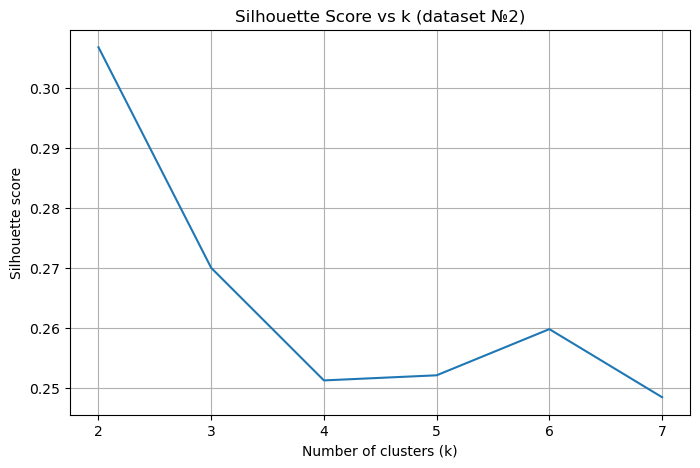

Best k: 2
Best silhouette_score: 0.3068610017701601


In [ ]:
PCA_2D_scatter(X_df_2_processed, labels_2_1, f"KMean cluster, dataset №2 (K={model_2_1.n_clusters})")
PCA_2D_scatter(X_df_2_processed, labels_2_2, f"AgglomerativeClustering, dataset №2 (K = {model_2_2.n_clusters})")
silhouette_vs_k(X_df_2_processed, "(dataset №2)")

In [ ]:
metrics_2_1 = save_metrics(X_df_2_processed, labels_2_1, "Dataset №2", "KMeans")
for i in metrics_2_1:
    print(f"{i}: {metrics_2_1[i]}")

print("------------------------------------------------------------")

metrics_2_2 = save_metrics(X_df_2_processed, labels_2_2, "Dataset №2", "AgglomerativeClustering")
for i in metrics_2_2:
    print(f"{i}: {metrics_2_2[i]}")


dataset: Dataset №2
model: KMeans
noise_points: 0
noise_ratio: 0.0
sihouette_score: 0.25126198673567773
davies_bouldin_score: 1.3001480229740283
calinski_harabasz_score: 2915.5877696831076
------------------------------------------------------------
dataset: Dataset №2
model: AgglomerativeClustering
noise_points: 0
noise_ratio: 0.0
sihouette_score: 0.2658744116185544
davies_bouldin_score: 1.4673684423118982
calinski_harabasz_score: 2929.7223479920044


#### Вывод по метрикам:
По полученным метрикам можно сделать вывод, что разница в показателях у двух моделей минимальна. AgglomerativeClustering выигрывает по 2 показателем из 3, однако, модель KMeans выигрывает по метрике davies_bouldin_score, которая очень важна в этом датасете, ведь два кластера перекрывают друг друга, и модель KMeans обрабатывает это лучше.

Первоначально пробовала обрабатывать этот датасет с помощью DBSCAN, но подобрать параметры было просто невозможно, либо определялось огромное число датасетов, либо один лишь шум, поэтому я исключила эту модель из итогового отчёта.
Как и в примере с предыдушим датасетом первоначально было сложно понять, сколько кластеров изображено на графике, но после тестов с silhouette_vs_k стало ясно, что их 2 (я думала, что 4).

Отбор параметров не составил труда, я взяла базовые параметры (только немного эксперементировала с linkage у AgglomerativeClustering, но выбор в коде самый оптимальный), как видно, обе модели показывают неплохие результаты по обработке.

In [ ]:
preproces_df_4 = preprocessor(X_df_4_num, X_df_4_categ)

X_df_4_processed = preproces_df_4.fit_transform(X_df_4)

model_4_1 = KMeans(n_clusters=5, random_state=42, n_init=15)
model_4_2 = DBSCAN(eps=3.3, min_samples=5)

labels_4_1 = model_4_1.fit_predict(X_df_4_processed)
labels_4_2 = model_4_2.fit_predict(X_df_4_processed)

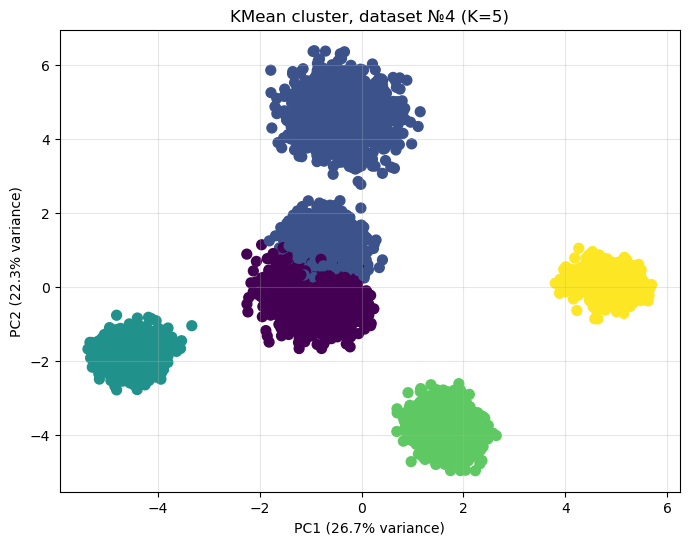

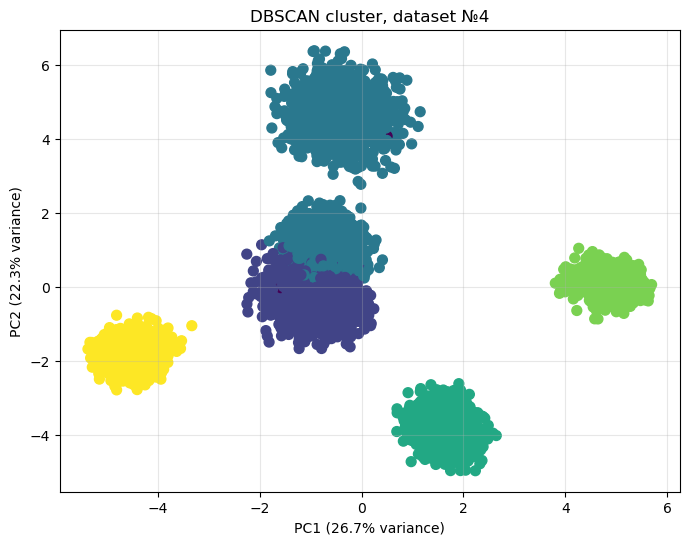

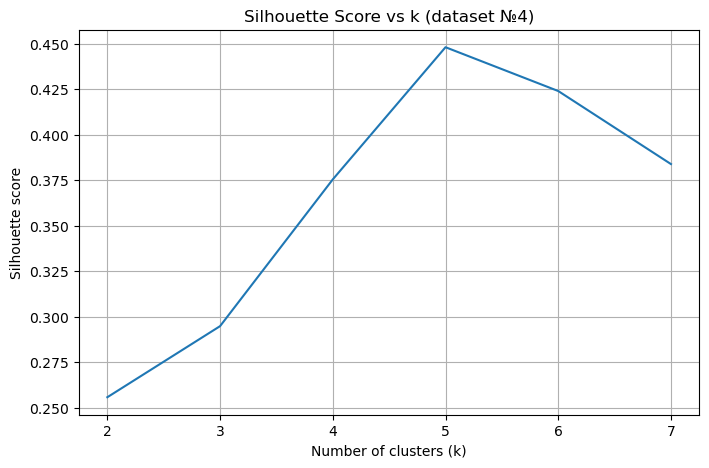

Best k: 5
Best silhouette_score: 0.4480173757704073


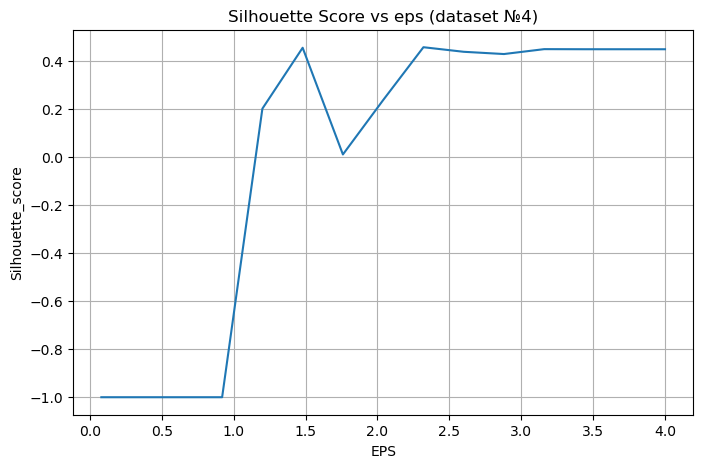

Best eps: 2.32
Best silhouette_score: 0.4564519530403688


In [ ]:
PCA_2D_scatter(X_df_4_processed, labels_4_1,  f"KMean cluster, dataset №4 (K={model_4_1.n_clusters})")
PCA_2D_scatter(X_df_4_processed, labels_4_2,  f"DBSCAN cluster, dataset №4")
silhouette_vs_k(X_df_4_processed, "(dataset №4)")
silhouette_vs_eps(X_df_4_processed, "(dataset №4)")

In [ ]:
metrics_4_1 = save_metrics(X_df_4_processed, labels_4_1, "Dataset №4", "KMeans")
for i in metrics_4_1:
    print(f"{i}: {metrics_4_1[i]}")

print("------------------------------------------------------------------------")

metrics_4_2 = save_metrics(X_df_4_processed, labels_4_2, "Dataset №4", "DBSCAN")
for i in metrics_4_2:
    print(f"{i}: {metrics_4_2[i]}")


dataset: Dataset №4
model: KMeans
noise_points: 0
noise_ratio: 0.0
sihouette_score: 0.4480173757704073
davies_bouldin_score: 0.9756940955278773
calinski_harabasz_score: 5103.099776986093
------------------------------------------------------------------------
dataset: Dataset №4
model: DBSCAN
noise_points: 5
noise_ratio: 0.0005
sihouette_score: 0.4481166925611092
davies_bouldin_score: 0.9754672333344209
calinski_harabasz_score: 5104.453680939717


#### Вывод по метрикам:
По полученным данным видно, что метрики почти полностью совпадают, отклонения минимальны.

Также как и с другими датасетами было сложно разобраться в структуре кластеров. Я думала, что они будут разделены несколько по иному, нежели как на визуализации их на графиках. Но хотя бы предположения о количестве кластеров совпали с ожиланием.

Обе модели обрабатывают массив хорошо.

### Функции для сохранения результатов 

In [ ]:
def save_metrics_res(): 

    metrics = [
        metrics_1_1, 
        metrics_1_2,
        metrics_2_1,
        metrics_2_2,
        metrics_4_1,
        metrics_4_2
    ]
    
    with open("artifacts/metrics_summary.json", "w", encoding="utf-8") as a:
        json.dump(metrics, a, indent=2, ensure_ascii=False)

save_metrics_res()
    

Лучшие параметры для датасетов

In [ ]:
def save_params(): 

    metrics = {
        "KMeans":{
            "dataset №1":{
                "n_clusters": model_1_1.n_clusters,
                "random_state": model_1_1.random_state,
                "n_init": model_1_1.n_init,
                "criterion": "silhouette_score"  
            },
            "dataset №2":{
                "n_clusters": model_2_1.n_clusters,
                "random_state": model_2_1.random_state,
                "n_init": model_2_1.n_init,
                "criterion": "silhouette_score"    
            },
            "dataset №4":{
                "n_clusters": model_4_1.n_clusters,
                "random_state": model_4_1.random_state,
                "n_init": model_4_1.n_init,
                "criterion": "silhouette_score"    
            }
        },

        "DBSCAN":{
            "dataset №1":{
                "eps": model_1_2.eps,
                "min_samples": model_1_2.min_samples,
                "criterion": "silhouette_score"  
            },
            "dataset №4":{
                "eps": model_4_2.eps,
                "min_samples": model_4_2.min_samples,
                "criterion": "silhouette_score"    
            },
        },

        "AgglomerativeClustering": {
            "dataset №2":{
            "n_clusters": model_2_2.n_clusters,
            "linkage": model_2_2.linkage,
            "metric": model_2_2.metric,
            "criterion": "silhouette_score"  
            },
        }
    }
    
    with open("artifacts/best_configs.json", "w", encoding="utf-8") as a:
        json.dump(metrics, a, indent=2, ensure_ascii=False)

save_params()
    

CSV-файлы с присвоенными кластерами для лучшего решения 

In [ ]:
def save_labels(samlpe_ids, labels, dataset_number, model):

    df_labels = pd.DataFrame({
        "sample_ids": samlpe_ids,
        "labels": labels
    })

    df_labels.to_csv(f"artifacts/labels/labels_hw07_ds{dataset_number}_{model}.csv")

save_labels(X_sample_id_1, labels_1_1, 1, "KMeans")
save_labels(X_sample_id_1, labels_1_2, 1, "DBSCAN")
save_labels(X_sample_id_2, labels_2_1, 2, "KMeans")
save_labels(X_sample_id_2, labels_2_2, 2, "AgglomerativeClustering")
save_labels(X_sample_id_4, labels_4_1, 4, "KMeans")
save_labels(X_sample_id_4, labels_4_2, 4, "DBSCAN")

Устойчивость датасета №2

Проверка на разных random_state

In [ ]:
random_states = [15, 42, 101, 342, 500]
labels_scores = []
ARI_scores = []

for i in random_states:
    kmean_model_1 = KMeans(random_state=i, n_clusters=2, n_init = 15)
    labels_scores.append(kmean_model_1.fit_predict(X_df_2_processed))

for i in range(4):
    for j in range(4):
        ARI_scores.append(adjusted_rand_score(labels_scores[i], labels_scores[j]))

ari_mean = np.mean(ARI_scores)
ari_mean

0.9990002812736758

Для каждого запуска с различным random_states вычисляется уровень схожести его ответов с другими такими же запусками, это позволяет понять, что в датасете все данные имеют одинаково надёжную структуру, и модель при любых random_states отрабатывает хорошо.

Проверка на разных n_clusters

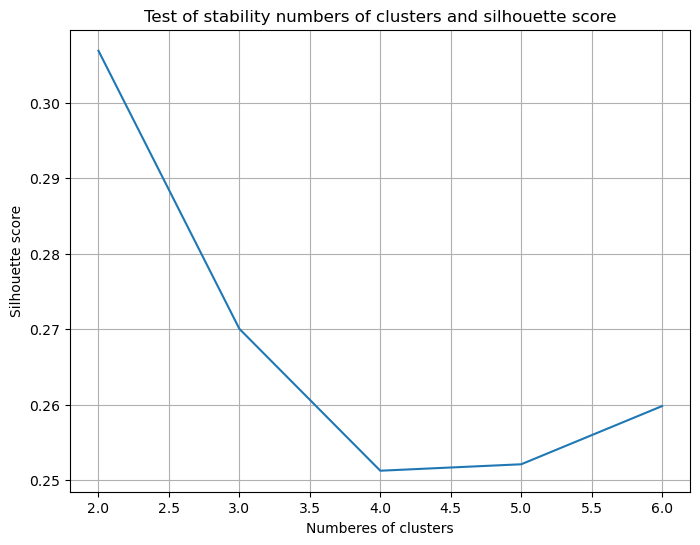

In [ ]:
k = [2, 3, 4, 5, 6]
silhouette_score_k = []

for i in k:
    kmean_model_2 = KMeans(random_state=42, n_clusters=i, n_init=15)
    labels_2 = kmean_model_2.fit_predict(X_df_2_processed)
    silhouette_score_k.append(silhouette_score(X_df_2_processed, labels_2))

plt.figure(figsize=(8, 6))
plt.plot(k, silhouette_score_k)
plt.xlabel("Numberes of clusters")
plt.ylabel("Silhouette score")
plt.title("Test of stability numbers of clusters and silhouette score")
plt.grid(True)
plt.show()

Если silhouette_score у данных с разными значениями n_clusters сильно разнится значит датафрейм скорее всего не имеет чёткой кластерной структуры, что показывает плохую устойчивость. В нашем же случае, разница показателей составляет ~ 0.05, значит, что датафрейм устойчивый.